In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle_survey_2022_responses.csv')
df.drop(index=0,inplace=True) # Xóa cột câu hỏi
df=df.drop(columns=['Duration (in seconds)'])
df.head()
df.info()

<ipython-input-2-94f6a4de4535>:4: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle_survey_2022_responses.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23997 entries, 1 to 23997
Columns: 295 entries, Q2 to Q44_12
dtypes: object(295)
memory usage: 54.0+ MB


In [3]:
df = df[~df["Q4"].isin(['', 'Other', 'I do not wish to disclose my location'])]
df['Q4'] = df["Q4"].replace({
    'United States of America': 'United States',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    "People 's Republic of China": 'China',
    'Iran, Islamic Republic of...': 'Iran',
    'Hong Kong (S.A.R.)': 'Hong Kong'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22525 entries, 1 to 23997
Columns: 295 entries, Q2 to Q44_12
dtypes: object(295)
memory usage: 50.9+ MB


<ipython-input-3-6e8dca5ed56d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q4'] = df["Q4"].replace({


In [4]:
df = df[~df["Q8"].isin(['', 'I prefer not to answer'])]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21217 entries, 1 to 23997
Columns: 295 entries, Q2 to Q44_12
dtypes: object(295)
memory usage: 47.9+ MB


In [5]:
df = df[~((df["Q8"].isin(['Doctoral degree', 'Professional doctorate'])) & (df["Q2"].isin(['18-21', '22-24'])))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20991 entries, 1 to 23997
Columns: 295 entries, Q2 to Q44_12
dtypes: object(295)
memory usage: 47.4+ MB


In [6]:

df = df[~((df["Q11"] == '20+ years') & (df["Q2"].isin(['18-21', '22-24', '25-29'])))]
df = df[~((df["Q16"] == '20+ years') & (df["Q2"].isin(['18-21', '22-24', '25-29'])))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20991 entries, 1 to 23997
Columns: 295 entries, Q2 to Q44_12
dtypes: object(295)
memory usage: 47.4+ MB


In [7]:

CountryTable = df.groupby('Q4').size().reset_index(name='NumberOfUsers')
CountryTable = CountryTable[CountryTable['NumberOfUsers'] >= 80]
CountryTable = CountryTable.rename(columns={'Q4': 'CountryName'})

In [8]:

EducationTable = df.groupby('Q8').size().reset_index(name='NumberOfUsers')
EducationTable = EducationTable[EducationTable['NumberOfUsers'] >= 80]
EducationTable = EducationTable.rename(columns={'Q8': 'EducationLevel'})

In [9]:
EducationTable.sort_values(by='NumberOfUsers', ascending=False)

EducationLevel  NumberOfUsers
2                                    Master’s degree           8551
0                                  Bachelor’s degree           7275
1                                    Doctoral degree           2300
5  Some college/university study without earning ...           1323
3               No formal education past high school            522
4                             Professional doctorate            459

In [10]:
CountryTable.sort_values(by='NumberOfUsers', ascending=False)

CountryName  NumberOfUsers
19                 India           8023
53         United States           2854
5                 Brazil            787
32               Nigeria            707
33              Pakistan            589
25                 Japan            488
9                  China            401
28                Mexico            369
13                 Egypt            347
20             Indonesia            344
49                Turkey            314
39                Russia            287
43           South Korea            283
15                France            253
52        United Kingdom            251
7                 Canada            251
10              Colombia            241
44                 Spain            241
3             Bangladesh            236
46                Taiwan            220
26                 Kenya            198
1              Argentina            196
54              Viet Nam            185
24                 Italy            174
29               Morocco            157
2              Australia            139
34                  Peru            115
47              Thailand            115
21                  Iran            111
8                  Chile            111
48               Tunisia            111
36                Poland            109
31           Netherlands            108
42          South Africa            108
17                 Ghana            106
35           Philippines            105
16               Germany             99
14              Ethiopia             97
23                Israel             97
37              Portugal             86
51  United Arab Emirates             86

In [11]:
df_young_adults = df[df['Q2'].str.contains('18-21|25-29|22-24|30-34|35-39')]
total_young_adults = df_young_adults['Q2'].value_counts().values.sum()

df_middle_age_adults = df[df['Q2'].str.contains('40-44|45-49|50-54|55-59')]
total_middle_age_adults = df_middle_age_adults['Q2'].value_counts().values.sum()

df_old_adults = df[df['Q2'].str.contains('60-69|70+')]
total_old_adults = df_old_adults['Q2'].value_counts().values.sum()

print('\n', 'total_young_adults: ', total_young_adults, '\n', 'total_middle_age_adults: ', total_middle_age_adults, '\n', 'total_old_adults: ', total_old_adults)


 total_young_adults:  16325 
 total_middle_age_adults:  4095 
 total_old_adults:  571


In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows = 1, cols = 2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = df['Q2'].value_counts().index, values = df['Q2'].value_counts().values), 1, 1)
fig.add_trace(go.Pie(labels = ['Young Adults 18-39', 'Middle Age Adults 40-59', 'Old Adults 60+'], values = ['16325 ', '4095 ', '571']), 1, 2)

fig.update_traces(hole = 0.5, hoverinfo="label+percent")
fig.update_layout(
    title_text = 'Age Distribution Among all Ages vs 3 Age Groups Across 🌍',
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='All Ages', x=0.18, y=0.5, font_size=12, showarrow=False),
                 dict(text='3 Age Groups', x=0.85, y=0.5, font_size=12, showarrow=False)])

In [13]:
import plotly.express as px
labels=['Man','Woman','Prefer not to say','Nonbinary','Self-describe']
gen_perc = df['Q3'].value_counts(normalize=False)
gen_perc = list(gen_perc)

# Bar Chart in Gender distribution
ag=pd.DataFrame({'Gender':labels,'Count':gen_perc})
fig=px.bar(ag,x='Gender',y='Count',color='Gender',template='simple_white',text='Count',title='<b>Gender distribution')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.update_layout(title_x=0.5)
fig.show()
# Pie Chart in Gender distribution
fig=px.pie(values=gen_perc,names=labels,hole=.8,template='seaborn')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.add_annotation(dict(x=0.5, y=0.5,  align='center',xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,text="<b>Gender</b>"))
fig.show()

In [14]:
countries = df_young_adults[~df_young_adults['Q4'].str.contains('Other')]
countries_top_5 = countries['Q4'].value_counts().head()

age_group_pie = go.Figure(data = [go.Pie(values = countries_top_5.values, labels = countries_top_5.index)])

age_group_pie.update_traces(hole = 0.5)
age_group_pie.update_layout(title_text = 'Youth Distribution Among Top 5 Countries')
age_group_pie.show()


In [15]:
df['Q23'].value_counts()

occcupation_plot = go.Figure(data = [go.Pie(values = df['Q23'].value_counts().values, labels = df['Q23'].value_counts().index)])
occcupation_plot.update_traces(hole = 0.5)
occcupation_plot.update_layout(title_text = 'Occupation Distribution Among Kaggelers')

occcupation_plot.show()

In [16]:
india_0_999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'India') & (df['Q29'] == '$0-999')].shape[0]
india_1000_19999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'India') & (df['Q29'].isin(['1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999']))].shape[0]
india_20000_39999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'India') & (df['Q29'].isin(['20,000-24,999', '25,000-29,999', '30,000-39,999']))].shape[0]
india_40000_59999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'India') & (df['Q29'].isin(['40,000-49,999', '50,000-59,999']))].shape[0]
india_60000_79999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'India') & (df['Q29'].isin(['60,000-69,999', '70,000-79,999']))].shape[0]
india_80000_99999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'India') & (df['Q29'].isin(['80,000-89,999', '90,000-99,999']))].shape[0]
india_100000_124999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'India') & (df['Q29'].isin(['100,000-124,999']))].shape[0]
india_125000_149999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'India') & (df['Q29'].isin(['125,000-149,999']))].shape[0]
india_150000_199999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'India') & (df['Q29'].isin(['150,000-199,999']))].shape[0]
india_200000_249000 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'India') & (df['Q29'].isin(['200,000-249,999']))].shape[0]
india_250000_299999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'India') & (df['Q29'].isin(['250,000-299,999']))].shape[0]
india_300000_499999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'India') & (df['Q29'].isin(['300,000-499,999']))].shape[0]
india_500000_999999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'India') & (df['Q29'].isin(['$500,000-999,999']))].shape[0]
india_1000000 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'India') & (df['Q29'].isin(['>$1,000,000']))].shape[0]

usa_0_999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'United States') & (df['Q29'] == '$0-999')].shape[0]
usa_1000_19999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'United States') & (df['Q29'].isin(['1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999']))].shape[0]
usa_20000_39999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'United States') & (df['Q29'].isin(['20,000-24,999', '25,000-29,999', '30,000-39,999']))].shape[0]
usa_40000_59999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'United States') & (df['Q29'].isin(['40,000-49,999', '50,000-59,999']))].shape[0]
usa_60000_79999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'United States') & (df['Q29'].isin(['60,000-69,999', '70,000-79,999']))].shape[0]
usa_80000_99999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'United States') & (df['Q29'].isin(['80,000-89,999', '90,000-99,999']))].shape[0]
usa_100000_124999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'United States') & (df['Q29'].isin(['100,000-124,999']))].shape[0]
usa_125000_149999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'United States') & (df['Q29'].isin(['125,000-149,999']))].shape[0]
usa_150000_199999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'United States') & (df['Q29'].isin(['150,000-199,999']))].shape[0]
usa_200000_249000 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'United States') & (df['Q29'].isin(['200,000-249,999']))].shape[0]
usa_250000_299999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'United States') & (df['Q29'].isin(['250,000-299,999']))].shape[0]
usa_300000_499999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'United States') & (df['Q29'].isin(['300,000-499,999']))].shape[0]
usa_500000_999999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'United States') & (df['Q29'].isin(['$500,000-999,999']))].shape[0]
usa_1000000 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'United States') & (df['Q29'].isin(['>$1,000,000']))].shape[0]

brazil_0_999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Brazil') & (df['Q29'] == '$0-999')].shape[0]
brazil_1000_19999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Brazil') & (df['Q29'].isin(['1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999']))].shape[0]
brazil_20000_39999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Brazil') & (df['Q29'].isin(['20,000-24,999', '25,000-29,999', '30,000-39,999']))].shape[0]
brazil_40000_59999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Brazil') & (df['Q29'].isin(['40,000-49,999', '50,000-59,999']))].shape[0]
brazil_60000_79999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Brazil') & (df['Q29'].isin(['60,000-69,999', '70,000-79,999']))].shape[0]
brazil_80000_99999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Brazil') & (df['Q29'].isin(['80,000-89,999', '90,000-99,999']))].shape[0]
brazil_100000_124999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Brazil') & (df['Q29'].isin(['100,000-124,999']))].shape[0]
brazil_125000_149999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Brazil') & (df['Q29'].isin(['125,000-149,999']))].shape[0]
brazil_150000_199999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Brazil') & (df['Q29'].isin(['150,000-199,999']))].shape[0]
brazil_200000_249000 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Brazil') & (df['Q29'].isin(['200,000-249,999']))].shape[0]
brazil_250000_299999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Brazil') & (df['Q29'].isin(['250,000-299,999']))].shape[0]
brazil_300000_499999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Brazil') & (df['Q29'].isin(['300,000-499,999']))].shape[0]
brazil_500000_999999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Brazil') & (df['Q29'].isin(['$500,000-999,999']))].shape[0]
brazil_1000000 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Brazil') & (df['Q29'].isin(['>$1,000,000']))].shape[0]

pakistan_0_999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Pakistan') & (df['Q29'] == '$0-999')].shape[0]
pakistan_1000_19999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Pakistan') & (df['Q29'].isin(['1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999']))].shape[0]
pakistan_20000_39999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Pakistan') & (df['Q29'].isin(['20,000-24,999', '25,000-29,999', '30,000-39,999']))].shape[0]
pakistan_40000_59999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Pakistan') & (df['Q29'].isin(['40,000-49,999', '50,000-59,999']))].shape[0]
pakistan_60000_79999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Pakistan') & (df['Q29'].isin(['60,000-69,999', '70,000-79,999']))].shape[0]
pakistan_80000_99999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Pakistan') & (df['Q29'].isin(['80,000-89,999', '90,000-99,999']))].shape[0]
pakistan_100000_124999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Pakistan') & (df['Q29'].isin(['100,000-124,999']))].shape[0]
pakistan_125000_149999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Pakistan') & (df['Q29'].isin(['125,000-149,999']))].shape[0]
pakistan_150000_199999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Pakistan') & (df['Q29'].isin(['150,000-199,999']))].shape[0]
pakistan_200000_249000 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Pakistan') & (df['Q29'].isin(['200,000-249,999']))].shape[0]
pakistan_250000_299999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Pakistan') & (df['Q29'].isin(['250,000-299,999']))].shape[0]
pakistan_300000_499999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Pakistan') & (df['Q29'].isin(['300,000-499,999']))].shape[0]
pakistan_500000_999999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Pakistan') & (df['Q29'].isin(['$500,000-999,999']))].shape[0]
pakistan_1000000 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Pakistan') & (df['Q29'].isin(['>$1,000,000']))].shape[0]

nigeria_0_999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Nigeria') & (df['Q29'] == '$0-999')].shape[0]
nigeria_1000_19999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Nigeria') & (df['Q29'].isin(['1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999', '10,000-14,999', '15,000-19,999']))].shape[0]
nigeria_20000_39999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Nigeria') & (df['Q29'].isin(['20,000-24,999', '25,000-29,999', '30,000-39,999']))].shape[0]
nigeria_40000_59999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Nigeria') & (df['Q29'].isin(['40,000-49,999', '50,000-59,999']))].shape[0]
nigeria_60000_79999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Nigeria') & (df['Q29'].isin(['60,000-69,999', '70,000-79,999']))].shape[0]
nigeria_80000_99999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Nigeria') & (df['Q29'].isin(['80,000-89,999', '90,000-99,999']))].shape[0]
nigeria_100000_124999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Nigeria') & (df['Q29'].isin(['100,000-124,999']))].shape[0]
nigeria_125000_149999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Nigeria') & (df['Q29'].isin(['125,000-149,999']))].shape[0]
nigeria_150000_199999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Nigeria') & (df['Q29'].isin(['150,000-199,999']))].shape[0]
nigeria_200000_249000 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Nigeria') & (df['Q29'].isin(['200,000-249,999']))].shape[0]
nigeria_250000_299999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Nigeria') & (df['Q29'].isin(['250,000-299,999']))].shape[0]
nigeria_300000_499999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Nigeria') & (df['Q29'].isin(['300,000-499,999']))].shape[0]
nigeria_500000_999999 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Nigeria') & (df['Q29'].isin(['$500,000-999,999']))].shape[0]
nigeria_1000000 = df.loc[(df['Q23'] == 'Data Scientist') & (df['Q4'] == 'Nigeria') & (df['Q29'].isin(['>$1,000,000']))].shape[0]

In [17]:
value_india = [india_0_999, india_1000_19999, india_20000_39999, india_40000_59999, india_60000_79999, india_80000_99999, india_100000_124999, india_125000_149999, india_150000_199999, india_200000_249000, india_250000_299999, india_300000_499999, india_500000_999999, india_1000000]
label = ['$0-$999', '$1000-$19,000', '$20,000-$39,000', '$40,000-$59,000', '$60,000-$79,000', '$80,000-$99,999', '$100,000-$124,999', '$125,000-$149,999', '$150,000-$199,999', '$200,000-$249,999', '$250,000-$299,999', '$300,000-$499,999', '$500,000-$999,999', '>$1,000,000']

value_usa = [usa_0_999, usa_1000_19999, usa_20000_39999, usa_40000_59999, usa_60000_79999, usa_80000_99999, usa_100000_124999, usa_125000_149999, usa_150000_199999, usa_200000_249000, usa_250000_299999, usa_300000_499999, usa_500000_999999, usa_1000000]

salary = make_subplots(rows = 1, cols = 2, specs=[[{'type':'domain'}, {'type':'domain'}]])

salary.add_trace(go.Pie(labels = label, values = value_india), 1, 1)
salary.add_trace(go.Pie(labels = label, values = value_usa), 1, 2)

salary.update_traces(hole = 0.5, hoverinfo="label+percent")
salary.update_layout(
    title_text = '💸 Salary Comparision Between Data Scientists from Top 2 Countries - India & USA',
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='India', x=0.20, y=0.5, font_size=12, showarrow=False),
                 dict(text='USA', x=0.80, y=0.5, font_size=12, showarrow=False)])
salary.show()


In [18]:
df.loc[df['Q29'].isin(['>$1,000,000', '$500,000-999,999', '300,000-499,999', '250,000-299,999'])].groupby(df['Q4']).size().reset_index(name = 'counts').sort_values(by = ['counts'], ascending = False).head(10)

Q4  counts
19   United States     145
8            India      29
18  United Kingdom       7
0        Australia       5
11           Japan       4
1           Brazil       3
6           France       3
9          Ireland       2
20        Zimbabwe       2
2           Canada       2

In [19]:
exp = go.Figure(data = [go.Pie(values = df['Q11'].value_counts().values, labels = df['Q11'].value_counts().index)])

# exp.add_trace(go.Pie(labels = df['For how many years have you been writing code and/or programming?'].value_counts().index, values = df['For how many years have you been writing code and/or programming?'].value_counts().values), 1, 1)
exp.update_traces(hole = 0.5, hoverinfo="label+percent+value")
exp.update_layout(
    title_text = '💻 General Coding Experience Distribution Among Kagglers',
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='# of Years', x=0.50, y=0.5, font_size=12, showarrow=False)])

In [20]:
exp_countries = make_subplots(rows = 1, cols = 2, specs=[[{'type':'domain'}, {'type':'domain'}]])

exp_countries.add_trace(go.Pie(labels = df['Q4'].loc[df['Q11'] == '20+ years'].value_counts().head(10).index, values = df['Q4'].loc[df['Q11'] == '20+ years'].value_counts().head(10).values), 1, 1)
exp_countries.add_trace(go.Pie(labels = df['Q4'].loc[df['Q11'] == '1-3 years'].value_counts().head(10).index, values = df['Q4'].loc[df['Q11'] == '1-3 years'].value_counts().head(10).values), 1, 2)

exp_countries.update_traces(hole = 0.5, hoverinfo="label+percent+value")
exp_countries.update_layout(
    title_text = '🌍 Coding Experience Distribution Among Countries',
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='20+ Years Exp.', x=0.15, y=0.5, font_size=10, showarrow=False),
                 dict(text='1-3 Years Exp.', x=0.86, y=0.5, font_size=10, showarrow=False)])

exp.show()
exp_countries.show()

In [21]:
data= df.copy()

In [22]:
# Q2 What is your age (# years)?
#[List of Values]
age_below25 = ['18-21', '22-24']
age_between25_49=['25-29','30-34','35-39', '40-44', '45-49']
age_above50 = ['50-54', '55-59', '60-69', '70-79','80+']
data['age_below25'] = data['Q2'].isin(age_below25).astype(int)
data['age_between25_49'] = data['Q2'].isin(age_between25_49).astype(int)
data['age_above50'] = data['Q2'].isin(age_above50).astype(int)

In [23]:
countries = ['Australia', 'Canada', 'Ireland', 'Czech Republic', 'Bangladesh', 'United States', 'Japan',
             'Pakistan', 'Italy', 'South Africa', 'China', 'Egypt', 'Germany', 'Spain', 'Netherlands', 'Chile',
             'United Kingdom', 'Argentina', 'Singapore', 'Israel', 'Thailand',
             'Mexico', 'Tunisia', 'Brazil', 'Philippines', 'Portugal', 'Nigeria', 'Malaysia', 'Turkey', 'Romania', 'Peru',
             'Belgium', 'Viet Nam', 'France', 'Poland',  'Indonesia', 'India', 'South Korea', 'Russia',
             'Colombia']
data['countries'] = data['Q4'].isin(countries).astype(int)

In [24]:
levels= ['No formal education past high school', 'Some college/university study without earning a bachelor’s degree', 'Bachelor’s degree', 'Master’s degree', 'Doctoral degree', 'Professional doctorate']

In [25]:
data['is_female']=data['Q3'].isin(['Woman']).astype(int)

In [26]:
#Gom giá trị bằng cấp thành có phải master hoặc phd và không phải master hoặc phd
# Q8
#What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
#● No formal education past high school
#● Some college/university study without earning a bachelor’s degree
#● Bachelor’s degree
#● Master’s degree
#● Doctoral degree
#● Professional doctorate
#● I prefer not to answer
#data['Q8']=data['Q8'].replace(['Professional doctorate', ], 'Doctoral degree')\
        #.replace(['Some college/university study without earning a bachelor’s degree', ], 'Some college/university study')\
        #.replace(['I prefer not to answer', ], 'Other')\
        #.replace(['Professional degree', ], 'Other')\
        #.replace(['No formal education past high school', ], 'High school').fillna('Other')
#data['is_master_phd'] = data['Q8'].isin(['Doctoral degree', 'Master’s degree']).astype(int)


In [27]:
#Q30
below100 = ['$0 ($USD)', '$1-$99']
between100_9999 = ['$100-$999',  '$1000-$9,999']
above10k = ['$10,000-$99,999','$100,000 or more ($USD)']
data['below100'] = data['Q30'].isin(below100).astype(int)
data['between100_9999'] = data['Q30'].isin(between100_9999).astype(int)
data['above10k'] = data['Q30'].isin(above10k).astype(int)

In [28]:
# Q29
# What is your current yearly compensation (approximate $USD)?
# [List of Values]
below10k = ['$0-999', '1,000-1,999','2,000-2,999', '3,000-3,999','4,000-4,999', '5,000-7,499','7,500-9,999', ]
between100k_200k = ['100,000-124,999',  '125,000-149,999','15,000-19,999', '150,000-199,999',]
above200k = [ '200,000-249,999','250,000-299,999', '300,000-499,999', '$500,000-999,999', '>$1,000,000']

data['below10k'] = data['Q29'].isin(below10k).astype(int)
data['between100k_200k'] = data['Q29'].isin(between100k_200k).astype(int)
data['above200k'] = data['Q29'].isin(above200k).astype(int)

In [29]:
#Q11
#For how many years have you been writing code and/or programming?
#● I have never written code
#● < 1 years
#● 1-2 years
#● 3-5 years
#● 5-10 years
#● 10-20 years
#● 20+ years
no_coding = ['I have never written code']
coding_less5yrs = ['3-5 years', '1-3 years','< 1 years',]
coding_above5yrs = ['10-20 years', '5-10 years', '20+ years',]

data['no_coding'] = data['Q11'].isin(no_coding).astype(int)
data['coding_less5yrs'] = data['Q11'].isin(coding_less5yrs).astype(int)
data['coding_above5yrs'] = data['Q11'].isin(coding_above5yrs).astype(int)

In [30]:
#Q16
#For how many years have you used machine learning methods?
#● I do not use machine learning methods
#● Under 1 year
#● 1-2 years
#● 2-3 years
#● 3-4 years
#● 4-5 years
#● 5-10 years
#● 10-20 years
#● 20 or more years
ml_less2yrs = ['Under 1 year', '1-2 years', 'I do not use machine learning methods',]
ml_between3_10yrs=['4-5 years', '5-10 years', '3-4 years',]
ml_above10yrs = ['10-20 years', '20 or more years']

data['ml_less2yrs'] = data['Q16'].isin(ml_less2yrs).astype(int)
data['ml_between3_10yrs'] = data['Q16'].isin(ml_between3_10yrs).astype(int)
data['ml_above10yrs'] = data['Q16'].isin(ml_above10yrs).astype(int)

In [31]:
#Q25
#What is the size of the company where you are employed?
#● 0-49 employees
#● 50-249 employees
#● 250-999 employees
#● 1000-9,999 employees
#● 10,000 or more employees
emp_less50 = ['0-49 employees']
emp_between50_10k=['50-249 employees','250-999 employees','1000-9,999 employees']
emp_above10k = ['10,000 or more employees']
data['emp_less50'] = data['Q25'].isin(emp_less50).astype(int)
data['emp_between50_10k'] = data['Q25'].isin(emp_between50_10k).astype(int)
data['emp_above10k'] = data['Q25'].isin(emp_above10k).astype(int)

In [32]:
#Q18
#Which of the following ML algorithms do you use on a regular basis? (Select all that apply):
#● Linear or Logistic Regression
#● Decision Trees or Random Forests
#● Gradient Boosting Machines (xgboost, lightgbm, etc)
#● Bayesian Approaches
#● Evolutionary Approaches
#● Dense Neural Networks (MLPs, etc)
#● Convolutional Neural Networks
#● Generative Adversarial Networks
#● Recurrent Neural Networks
#● Transformer Networks (BERT, gpt-3, etc)
#● Autoencoder Networks (DAE, VAE, etc)
#● Graph Neural Networks
#● None
#● Other
data['GBM'] = data['Q18_3'].notna().astype(int)
cols = [f'Q18_{i}' for i in range(6, 13)]
data['DNN'] = (data[cols].isna().sum(axis=1)<7).astype(int)



In [33]:
cluster_cols = ['Q8', 'age_below25', 'age_between25_49','age_above50',
       'is_female', 'below10k', 'between100k_200k',
       'above200k', 'no_coding', 'coding_less5yrs', 'coding_above5yrs',
       'ml_less2yrs', 'ml_between3_10yrs','ml_above10yrs', 'emp_less50','emp_between50_10k', 'emp_above10k', 'GBM',
       'DNN','below100','between100_9999','above10k','countries']
X = data.loc[data["Q8"].isin(levels), cluster_cols].groupby("Q8").mean()
X

age_below25  \
Q8                                                                
Bachelor’s degree                                      0.579794   
Doctoral degree                                        0.000000   
Master’s degree                                        0.286282   
No formal education past high school                   0.358238   
Professional doctorate                                 0.000000   
Some college/university study without earning a...     0.522298   

                                                    age_between25_49  \
Q8                                                                     
Bachelor’s degree                                           0.372371   
Doctoral degree                                             0.794348   
Master’s degree                                             0.624488   
No formal education past high school                        0.509579   
Professional doctorate                                      0.766885   
Some college/university study without earning a...          0.387755   

                                                    age_above50  is_female  \
Q8                                                                           
Bachelor’s degree                                      0.045086   0.210997   
Doctoral degree                                        0.192609   0.238696   
Master’s degree                                        0.085136   0.223483   
No formal education past high school                   0.122605   0.141762   
Professional doctorate                                 0.211329   0.235294   
Some college/university study without earning a...     0.087680   0.204082   

                                                    below10k  \
Q8                                                             
Bachelor’s degree                                   0.118488   
Doctoral degree                                     0.148696   
Master’s degree                                     0.129926   
No formal education past high school                0.170498   
Professional doctorate                              0.191721   
Some college/university study without earning a...  0.080121   

                                                    between100k_200k  \
Q8                                                                     
Bachelor’s degree                                           0.036838   
Doctoral degree                                             0.115652   
Master’s degree                                             0.072974   
No formal education past high school                        0.026820   
Professional doctorate                                      0.078431   
Some college/university study without earning a...          0.022676   

                                                    above200k  no_coding  \
Q8                                                                         
Bachelor’s degree                                    0.009622   0.086323   
Doctoral degree                                      0.044348   0.051304   
Master’s degree                                      0.017659   0.074611   
No formal education past high school                 0.013410   0.172414   
Professional doctorate                               0.045752   0.074074   
Some college/university study without earning a...   0.008314   0.130763   

                                                    coding_less5yrs  \
Q8                                                                    
Bachelor’s degree                                          0.778419   
Doctoral degree                                            0.359565   
Master’s degree                                            0.643550   
No formal education past high school                       0.609195   
Professional doctorate                                     0.427015   
Some college/university study without earning a...         0.712018   

                                             

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

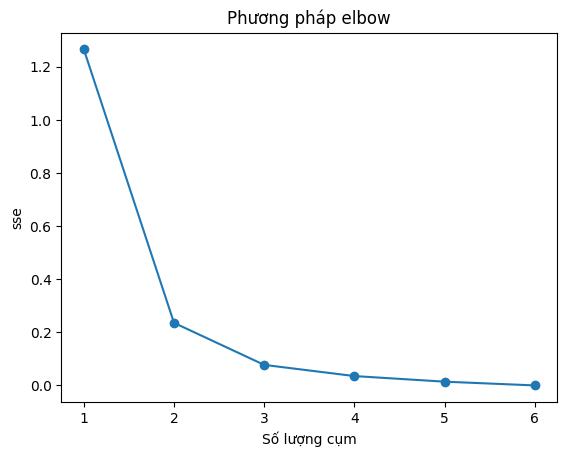

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

max_clusters = 6
sse = []
for k in range(1, max_clusters +1):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

plt.plot(range(1, max_clusters + 1), sse,marker= 'o')
plt.xlabel('Số lượng cụm')
plt.ylabel('sse')
plt.title('Phương pháp elbow')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



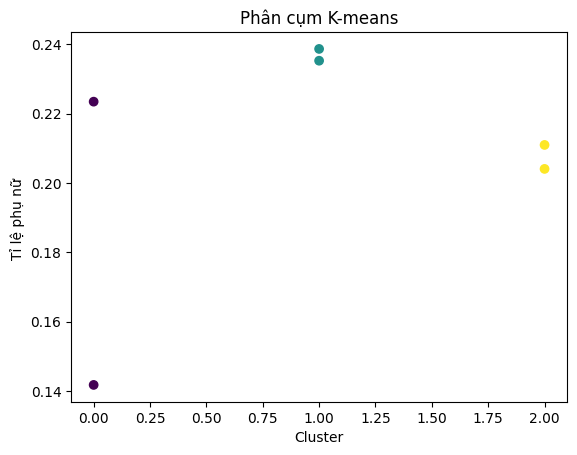

In [35]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

X['Cluster'] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

plt.scatter(X['Cluster'],X['is_female'], c=X['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Tỉ lệ phụ nữ ')
plt.title('Phân cụm K-means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



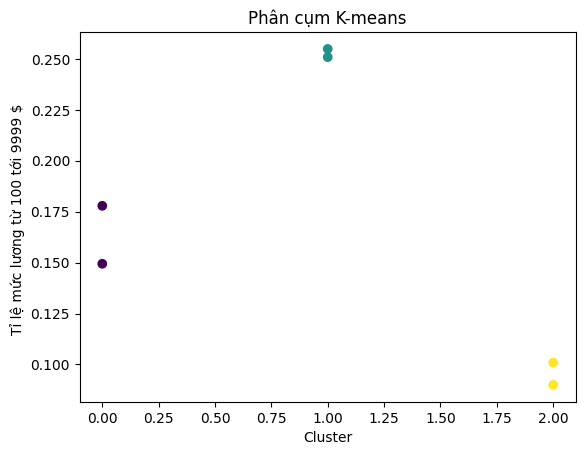

In [52]:

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

X['Cluster'] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

plt.scatter(X['Cluster'],X['between100_9999'], c=X['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Tỉ lệ mức lương từ 100 tới 9999 $ ')
plt.title('Phân cụm K-means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



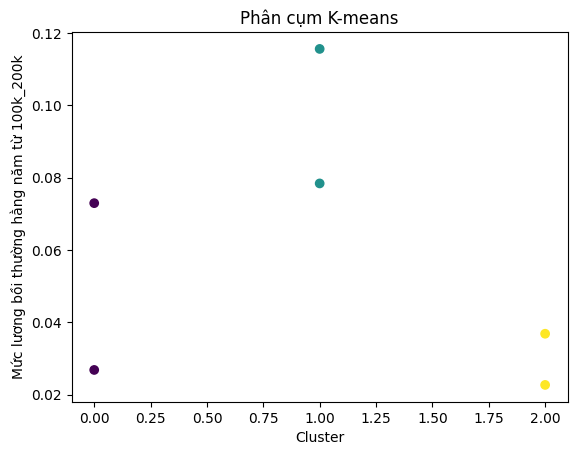

In [45]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

X['Cluster'] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

plt.scatter(X['Cluster'],X['between100k_200k'], c=X['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Mức lương bồi thường hằng năm từ 100k_200k')
plt.title('Phân cụm K-means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



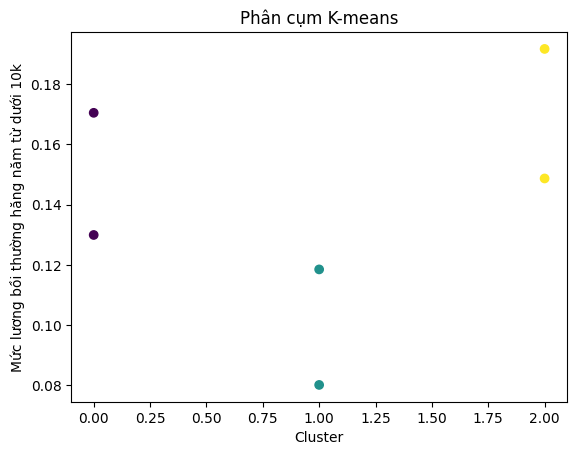

In [46]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

X['Cluster'] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

plt.scatter(X['Cluster'],X['below10k'], c=X['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Mức lương bồi thường hăng năm từ dưới 10k')
plt.title('Phân cụm K-means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



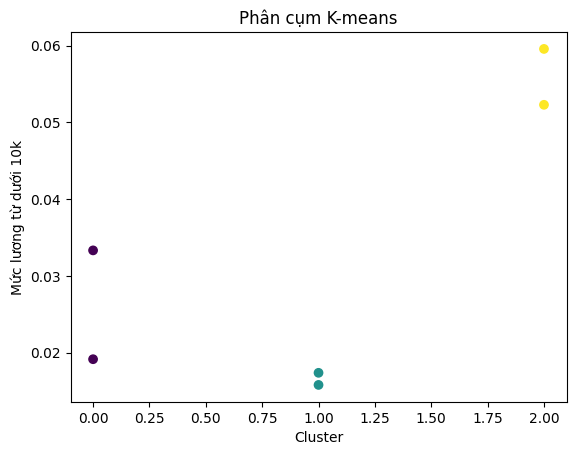

In [42]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

X['Cluster'] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

plt.scatter(X['Cluster'],X['above10k'], c=X['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Mức lương từ trên 10k')
plt.title('Phân cụm K-means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



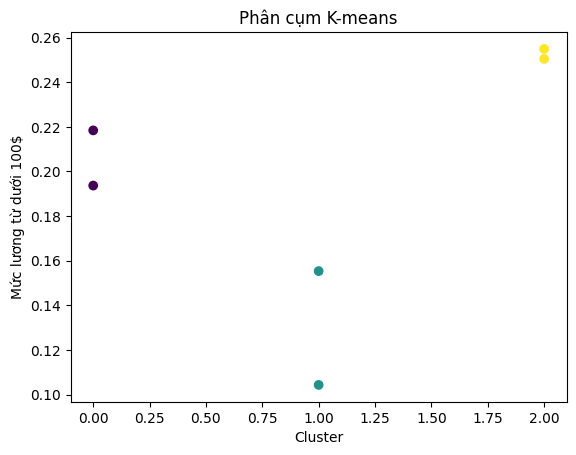

In [48]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

X['Cluster'] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

plt.scatter(X['Cluster'],X['below100'], c=X['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Mức lương từ dưới 100$')
plt.title('Phân cụm K-means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



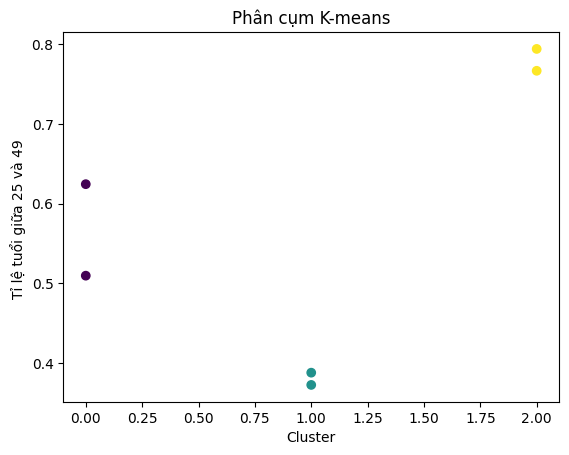

In [38]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

X['Cluster'] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

plt.scatter(X['Cluster'],X['age_between25_49'], c=X['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Tỉ lệ tuổi giữa 25 và 49 ')
plt.title('Phân cụm K-means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



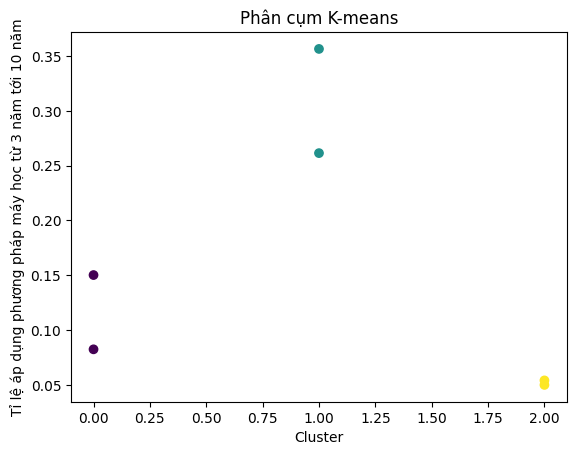

In [39]:
num_clusters = 3

ml_between3_10yrskmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

X['Cluster'] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

plt.scatter(X['Cluster'],X['ml_between3_10yrs'], c=X['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Tỉ lệ áp dụng phương pháp máy học từ 3 năm tới 10 năm')
plt.title('Phân cụm K-means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



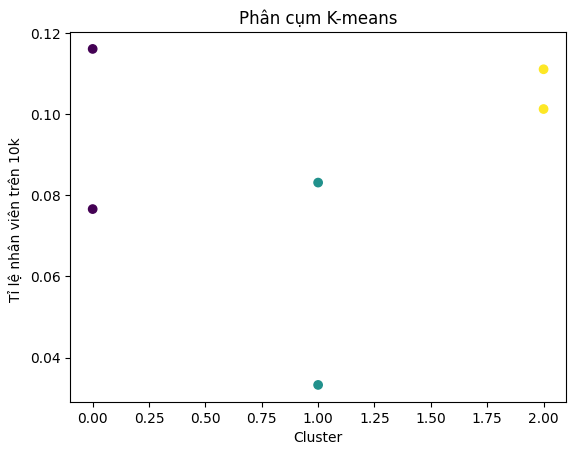

In [51]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

X['Cluster'] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

plt.scatter(X['Cluster'],X['emp_above10k'], c=X['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Tỉ lệ nhân viên trên 10k ')
plt.title('Phân cụm K-means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



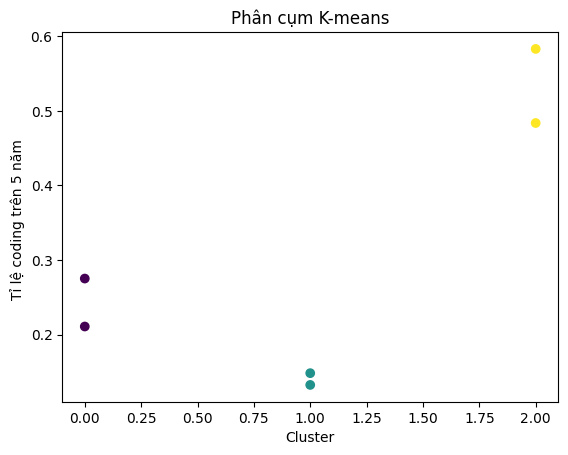

In [40]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

X['Cluster'] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

plt.scatter(X['Cluster'],X['coding_above5yrs'], c=X['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Tỉ lệ coding trên 5 năm ')
plt.title('Phân cụm K-means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



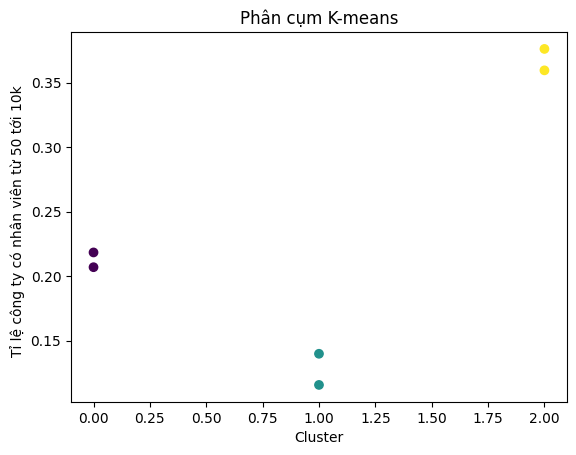

In [44]:
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

X['Cluster'] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

plt.scatter(X['Cluster'],X['emp_between50_10k'], c=X['Cluster'], cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('Tỉ lệ công ty có nhân viên từ 50 tới 10k  ')
plt.title('Phân cụm K-means')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7845 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND ACUTE}) missing from current font.



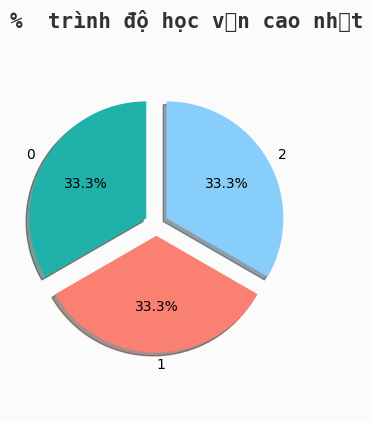

In [49]:
cs = X["Cluster"].value_counts().sort_values(ascending=False)

background_color = "#fbfbfb"
fig, ax = plt.subplots(1, 1, figsize=(3, 4), sharex=True, sharey=False, dpi=100,facecolor=background_color)

colormap = ['lightseagreen', 'salmon', 'lightskyblue']

ax.pie(cs.values, explode=[0.1,0.1,0.1],labels=cs.index.values, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=colormap, )

ax.axis('equal')

fig.text(.012, 1., '''%  trình độ học vấn cao nhất''', fontfamily='monospace',fontweight='bold',fontsize=15,color='#323232', ha='left')

#------




plt.tight_layout()
plt.show()

In [53]:
for cluster in [0, 1, 2]:
    print(f"Cluster {cluster}: {X[X['Cluster']==cluster].index.tolist()}")

Cluster 0: ['Master’s degree', 'No formal education past high school']
Cluster 1: ['Doctoral degree', 'Professional doctorate']
Cluster 2: ['Bachelor’s degree', 'Some college/university study without earning a bachelor’s degree']


In [54]:
df3=df.copy()
#perc= 75.0
#min_count= int(((100-perc)/100)*df3.shape[0] + 1)
#df4=df3.copy()
#df4= df3.dropna(axis=1, thresh= min_count)
#df4.info()
#df4= df3.copy()
#df4= df3.fillna(df3.mode().iloc[0])
#df4.head()
df6= df3.copy()
#df6.head()


In [55]:
df3[['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12', 'Q7_1',
          'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q10_1', 'Q10_2', 'Q10_3', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4',
          'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14', 'Q12_15', 'Q13_1',
          'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 'Q13_12', 'Q13_13',
          'Q13_14', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7', 'Q14_8', 'Q14_9', 'Q14_10', 'Q14_11',
          'Q14_12', 'Q14_13', 'Q14_14', 'Q14_15', 'Q14_16', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7',
          'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
          'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11', 'Q17_12', 'Q17_13', 'Q17_14', 'Q17_15', 'Q18_1',
          'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12', 'Q18_13',
          'Q18_14', 'Q19_1', 'Q19_2', 'Q19_3', 'Q19_4', 'Q19_5', 'Q19_6', 'Q19_7', 'Q19_8', 'Q20_1', 'Q20_2', 'Q20_3', 'Q20_4',
          'Q20_5', 'Q20_6', 'Q21_1', 'Q21_2', 'Q21_3', 'Q21_4', 'Q21_5', 'Q21_6', 'Q21_7', 'Q21_8', 'Q21_9', 'Q21_10', 'Q28_1',
          'Q28_2', 'Q28_3', 'Q28_4', 'Q28_5', 'Q28_6', 'Q28_7', 'Q28_8', 'Q31_1', 'Q31_2', 'Q31_3', 'Q31_4', 'Q31_5', 'Q31_6',
          'Q31_7', 'Q31_8', 'Q31_9', 'Q31_10', 'Q31_11', 'Q31_12', 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q34_1', 'Q34_2',
          'Q34_3', 'Q34_4', 'Q34_5', 'Q34_6', 'Q34_7', 'Q34_8', 'Q35_1', 'Q35_2', 'Q35_3', 'Q35_4', 'Q35_5', 'Q35_6', 'Q35_7',
          'Q35_8', 'Q35_9', 'Q35_10', 'Q35_11', 'Q35_12', 'Q35_13', 'Q35_14', 'Q35_15', 'Q35_16', 'Q36_1', 'Q36_2', 'Q36_3',
          'Q36_4', 'Q36_5', 'Q36_6', 'Q36_7', 'Q36_8', 'Q36_9', 'Q36_10', 'Q36_11', 'Q36_12', 'Q36_13', 'Q36_14', 'Q36_15',
          'Q37_1', 'Q37_2', 'Q37_3', 'Q37_4', 'Q37_5', 'Q37_6', 'Q37_7', 'Q37_8', 'Q37_9', 'Q37_10', 'Q37_11', 'Q37_12',
          'Q37_13', 'Q38_1', 'Q38_2', 'Q38_3', 'Q38_4', 'Q38_5', 'Q38_6', 'Q38_7', 'Q38_8', 'Q39_1', 'Q39_2', 'Q39_3', 'Q39_4',
          'Q39_5', 'Q39_6', 'Q39_7', 'Q39_8', 'Q39_9', 'Q39_10', 'Q39_11', 'Q39_12', 'Q40_1', 'Q40_2', 'Q40_3', 'Q40_4', 'Q40_5',
          'Q40_6', 'Q40_7', 'Q40_8', 'Q40_9', 'Q40_10', 'Q40_11', 'Q40_12', 'Q40_13', 'Q40_14', 'Q40_15', 'Q41_1', 'Q41_2',
          'Q41_3', 'Q41_4', 'Q41_5', 'Q41_6', 'Q41_7', 'Q41_8', 'Q41_9', 'Q42_1', 'Q42_2', 'Q42_3', 'Q42_4', 'Q42_5', 'Q42_6',
          'Q42_7', 'Q42_8', 'Q42_9', 'Q44_1', 'Q44_2', 'Q44_3', 'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
          'Q44_11', 'Q44_12']]= df3[['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12', 'Q7_1',
          'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q10_1', 'Q10_2', 'Q10_3', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4',
          'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14', 'Q12_15', 'Q13_1',
          'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 'Q13_12', 'Q13_13',
          'Q13_14', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7', 'Q14_8', 'Q14_9', 'Q14_10', 'Q14_11',
          'Q14_12', 'Q14_13', 'Q14_14', 'Q14_15', 'Q14_16', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7',
          'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
          'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11', 'Q17_12', 'Q17_13', 'Q17_14', 'Q17_15', 'Q18_1',
          'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12', 'Q18_13',
          'Q18_14', 'Q19_1', 'Q19_2', 'Q19_3', 'Q19_4', 'Q19_5', 'Q19_6', 'Q19_7', 'Q19_8', 'Q20_1', 'Q20_2', 'Q20_3', 'Q20_4',
          'Q20_5', 'Q20_6', 'Q21_1', 'Q21_2', 'Q21_3', 'Q21_4', 'Q21_5', 'Q21_6', 'Q21_7', 'Q21_8', 'Q21_9', 'Q21_10', 'Q28_1',
          'Q28_2', 'Q28_3', 'Q28_4', 'Q28_5', 'Q28_6', 'Q28_7', 'Q28_8', 'Q31_1', 'Q31_2', 'Q31_3', 'Q31_4', 'Q31_5', 'Q31_6',
          'Q31_7', 'Q31_8', 'Q31_9', 'Q31_10', 'Q31_11', 'Q31_12', 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q34_1', 'Q34_2',
          'Q34_3', 'Q34_4', 'Q34_5', 'Q34_6', 'Q34_7', 'Q34_8', 'Q35_1', 'Q35_2', 'Q35_3', 'Q35_4', 'Q35_5', 'Q35_6', 'Q35_7',
          'Q35_8', 'Q35_9', 'Q35_10', 'Q35_11', 'Q35_12', 'Q35_13', 'Q35_14', 'Q35_15', 'Q35_16', 'Q36_1', 'Q36_2', 'Q36_3',
          'Q36_4', 'Q36_5', 'Q36_6', 'Q36_7', 'Q36_8', 'Q36_9', 'Q36_10', 'Q36_11', 'Q36_12', 'Q36_13', 'Q36_14', 'Q36_15',
          'Q37_1', 'Q37_2', 'Q37_3', 'Q37_4', 'Q37_5', 'Q37_6', 'Q37_7', 'Q37_8', 'Q37_9', 'Q37_10', 'Q37_11', 'Q37_12',
          'Q37_13', 'Q38_1', 'Q38_2', 'Q38_3', 'Q38_4', 'Q38_5', 'Q38_6', 'Q38_7', 'Q38_8', 'Q39_1', 'Q39_2', 'Q39_3', 'Q39_4',
          'Q39_5', 'Q39_6', 'Q39_7', 'Q39_8', 'Q39_9', 'Q39_10', 'Q39_11', 'Q39_12', 'Q40_1', 'Q40_2', 'Q40_3', 'Q40_4', 'Q40_5',
          'Q40_6', 'Q40_7', 'Q40_8', 'Q40_9', 'Q40_10', 'Q40_11', 'Q40_12', 'Q40_13', 'Q40_14', 'Q40_15', 'Q41_1', 'Q41_2',
          'Q41_3', 'Q41_4', 'Q41_5', 'Q41_6', 'Q41_7', 'Q41_8', 'Q41_9', 'Q42_1', 'Q42_2', 'Q42_3', 'Q42_4', 'Q42_5', 'Q42_6',
          'Q42_7', 'Q42_8', 'Q42_9', 'Q44_1', 'Q44_2', 'Q44_3', 'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
          'Q44_11', 'Q44_12']].notnull().astype(int)




In [56]:
df3.to_csv('/content/drive/MyDrive/KPDL/DataLamSach.csv',index=False)

In [58]:
df3.to_excel('/content/drive/MyDrive/KPDL/DataLamSach.xlsx',index=False)

In [59]:
df3=df3.dropna(subset=['Q8'])

In [60]:
y= df3['Q8']
X=df3.drop(['Q8'], axis= 1)
X.head()

Q2     Q3       Q4   Q5  Q6_1  Q6_2  Q6_3  Q6_4  Q6_5  Q6_6  ...  Q44_3  \
2  30-34    Man  Algeria   No     0     0     0     0     0     0  ...      0   
3  18-21    Man    Egypt  Yes     1     1     0     1     0     1  ...      0   
4  55-59    Man   France   No     1     0     1     0     0     0  ...      0   
5  45-49    Man    India  Yes     0     0     0     0     0     0  ...      0   
6  18-21  Woman    India  Yes     1     1     0     1     0     1  ...      0   

   Q44_4  Q44_5  Q44_6  Q44_7  Q44_8  Q44_9  Q44_10  Q44_11  Q44_12  
2      0      0      0      0      0      0       0       0       0  
3      1      0      1      1      0      0       0       0       0  
4      1      1      0      0      1      0       0       0       0  
5      0      0      0      0      1      0       0       0       0  
6      1      1      1      0      1      0       0       0       0  

[5 rows x 294 columns]

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3,  random_state= 42)

knn = KNeighborsClassifier(n_neighbors = 1, p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN  Evaluation: ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


KNN  Evaluation: 
[[1475   30  416   73    6  190]
 [ 109  238  300   11   39   13]
 [ 670  222 1496   41   26   96]
 [  92    2   25   14    2   18]
 [  26   32   67    2    5    7]
 [ 256    8   50   22    1   49]]
                                                                   precision    recall  f1-score   support

                                                Bachelor’s degree       0.56      0.67      0.61      2190
                                                  Doctoral degree       0.45      0.34      0.38       710
                                                  Master’s degree       0.64      0.59      0.61      2551
                             No formal education past high school       0.09      0.09      0.09       153
                                           Professional doctorate       0.06      0.04      0.05       139
Some college/university study without earning a bachelor’s degree       0.13      0.13      0.13       386

                                

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
y= df3['Q8']
X=df3.drop(['Q8'], axis= 1)


# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (test data=train data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gộp features và nhãn lại thành môt DataFrame cho mỗi tập tin
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Lưu tập tin TrainData.csv
train_data.to_csv("/content/drive/MyDrive/KPDL/TrainData.csv", index=False)

# Lưu tập tin TestData.csv
test_data.to_csv("/content/drive/MyDrive/KPDL/TestData.csv", index=False)

print("Đã tách tập tin thành công! TrainData.csv và TestData.csv đã được tạo.")

Đã tách tập tin thành công! TrainData.csv và TestData.csv đã được tạo.


In [67]:

# Đọc dữ liệu từ tập tin TrainData.csv và TestData.csv
train_data = pd.read_csv("/content/drive/MyDrive/KPDL/TrainData.csv")
test_data = pd.read_csv("/content/drive/MyDrive/KPDL/TestData.csv")



# Chia dữ liệu huấn luyện và kiểm tra thành features (X) và nhãn (y)
X_train = train_data.drop("Q8", axis=1)
y_train = train_data["Q8"]
X_test = test_data.drop("Q8", axis=1)
y_test = test_data["Q8"]

#Chuyển đổi các cột dữ liệu dạng văn bản sang dạng số hóa
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Khởi tạo mô hình KNN với k = 1

knn = KNeighborsClassifier(n_neighbors = 1, p = 2)
knn.fit(X_train, y_train)



# Đánh giá mô hình KNN trên tập kiểm tra
print("KNN Evaluation on Test Data: ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


KNN Evaluation on Test Data: 
[[1475   30  416   73    6  190]
 [ 109  238  300   11   39   13]
 [ 670  222 1496   41   26   96]
 [  92    2   25   14    2   18]
 [  26   32   67    2    5    7]
 [ 256    8   50   22    1   49]]
                                                                   precision    recall  f1-score   support

                                                Bachelor’s degree       0.56      0.67      0.61      2190
                                                  Doctoral degree       0.45      0.34      0.38       710
                                                  Master’s degree       0.64      0.59      0.61      2551
                             No formal education past high school       0.09      0.09      0.09       153
                                           Professional doctorate       0.06      0.04      0.05       139
Some college/university study without earning a bachelor’s degree       0.13      0.13      0.13       386

                    

In [64]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.5346712351117637

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
clf1=KNeighborsClassifier(n_neighbors=3)
clf2=RandomForestClassifier(random_state=42)
clf3=GaussianNB()

y= df3['Q8']
X=df3.drop(['Q8'], axis= 1)
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3,  random_state= 42)

model= RandomForestClassifier()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print("RandomForestClassifier  Evaluation: ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
knn = KNeighborsClassifier(n_neighbors = 1, p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN  Evaluation: ")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("GaussianNB Evaluation:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

RandomForestClassifier  Evaluation: 
[[2168    0   12    1    0    9]
 [   1  307  402    0    0    0]
 [   2  111 2438    0    0    0]
 [ 148    0    1    1    0    3]
 [   0   50   89    0    0    0]
 [ 377    1    6    1    0    1]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



                                                                   precision    recall  f1-score   support

                                                Bachelor’s degree       0.80      0.99      0.89      2190
                                                  Doctoral degree       0.65      0.43      0.52       710
                                                  Master’s degree       0.83      0.96      0.89      2551
                             No formal education past high school       0.33      0.01      0.01       153
                                           Professional doctorate       0.00      0.00      0.00       139
Some college/university study without earning a bachelor’s degree       0.08      0.00      0.01       386

                                                         accuracy                           0.80      6129
                                                        macro avg       0.45      0.40      0.39      6129
                                   

In [68]:
#Cây quyết định
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz
#Chọn các cột đặc trưng và cột nhãn
#['Q2','Q30','Q3','Q4','Q5','Q6_1','Q6_3','Q6_7','Q6_10','Q7_1','Q7_2','Q7_4','Q7_5','Q9','Q11','Q12_1','Q12_3','Q13_4','Q13_5','Q13_11',
                 #'Q14_1','Q14_2','Q14_15','Q15_1','Q15_2','Q16','Q17_1','Q17_2','Q17_3','Q18_1','Q18_2','Q21_9','Q23','Q24','Q25','Q26','Q27',
                 #'Q29','Q44_4','Q44_6','Q44_8']
features = df3[['Q2','Q3','Q5','Q9','Q10_1','Q10_2','Q10_3','Q11','Q16','Q23','Q24','Q25','Q26','Q29','Q30']]

labels = df3['Q8']
features = pd.get_dummies(features)
train_features, test_features, train_labels, test_labels = train_test_split(features,labels,test_size=0.3,random_state= 42)
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best','random'],
    'max_depth' : [None,10,20,30],
    'min_samples_split' : [1,5,10],
    'min_samples_split' : [3,6,9]
}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf,param_grid,cv=5,scoring='accuracy')
grid_search.fit(train_features, train_labels)
best_clf = grid_search.best_estimator_
print("Best Parameters:",grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
tree_rules = export_text(best_clf,feature_names=list(train_features.columns))
print("Cac luat danh gia trinh do:")
print(tree_rules)
val = np.array(best_clf.classes_).astype('str').tolist()
dot_data = export_graphviz(best_clf, out_file=None,feature_names=list(train_features.columns),class_names=val, label="all", rounded=True,filled=True)
graph = graphviz.Source(dot_data)
graph.render(filename='/content/drive/MyDrive/KPDL/decision_tree_bigger',format='png',cleanup = True)
graph.view()

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 9, 'splitter': 'random'}
Best Accuracy: 0.7909234142299504
Cac luat danh gia trinh do:
|--- Q9_No <= 0.53
|   |--- Q9_Yes <= 0.56
|   |   |--- Q5_Yes <= 0.02
|   |   |   |--- Q2_25-29 <= 0.24
|   |   |   |   |--- Q2_22-24 <= 0.02
|   |   |   |   |   |--- Q2_30-34 <= 0.66
|   |   |   |   |   |   |--- Q2_35-39 <= 0.10
|   |   |   |   |   |   |   |--- Q23_Teacher / professor <= 0.29
|   |   |   |   |   |   |   |   |--- Q3_Man <= 0.45
|   |   |   |   |   |   |   |   |   |--- Q30_$100-$999 <= 0.29
|   |   |   |   |   |   |   |   |   |   |--- class: Bachelor’s degree
|   |   |   |   |   |   |   |   |   |--- Q30_$100-$999 >  0.29
|   |   |   |   |   |   |   |   |   |   |--- class: Some college/university study without earning a bachelor’s degree
|   |   |   |   |   |   |   |   |--- Q3_Man >  0.45
|   |   |   |   |   |   |   |   |   |--- Q29_125,000-149,999 <= 0.99
|   |   |   |   |   |   |   |   |   |   |--- class

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.710042 to fit


'/content/drive/MyDrive/KPDL/decision_tree_bigger.pdf'

In [71]:
#Cây quyết định
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
import graphviz
#Chọn các cột đặc trưng và cột nhãn

features = df3.drop(['Q8'],axis=1)

labels = df3['Q8']
features = pd.get_dummies(features)
train_features, test_features, train_labels, test_labels = train_test_split(features,labels,test_size=0.3,random_state= 42)
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best','random'],
    'max_depth' : [None,10,20,30],
    'min_samples_split' : [1,5,10],
    'min_samples_split' : [3,6,9]
}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf,param_grid,cv=5,scoring='accuracy')
grid_search.fit(train_features, train_labels)
best_clf = grid_search.best_estimator_
print("Best Parameters:",grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
tree_rules = export_text(best_clf,feature_names=list(train_features.columns))
print("Cac luat danh gia trinh do:")
print(tree_rules)
val = np.array(best_clf.classes_).astype('str').tolist()
dot_data = export_graphviz(best_clf, out_file=None,feature_names=list(train_features.columns),class_names=val, label="all", rounded=True,filled=True)
graph = graphviz.Source(dot_data)
graph.render(filename='/content/drive/MyDrive/KPDL/decision_tree_bigger',format='png',cleanup = True)
graph.view()

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 9, 'splitter': 'best'}
Best Accuracy: 0.7873570051060439
Cac luat danh gia trinh do:
|--- Q9_No <= 0.50
|   |--- Q9_Yes <= 0.50
|   |   |--- Q4_India <= 0.50
|   |   |   |--- Q5_Yes <= 0.50
|   |   |   |   |--- Q4_United States <= 0.50
|   |   |   |   |   |--- Q2_25-29 <= 0.50
|   |   |   |   |   |   |--- Q2_22-24 <= 0.50
|   |   |   |   |   |   |   |--- Q2_18-21 <= 0.50
|   |   |   |   |   |   |   |   |--- Q4_Japan <= 0.50
|   |   |   |   |   |   |   |   |   |--- Q4_Russia <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: Bachelor’s degree
|   |   |   |   |   |   |   |   |   |--- Q4_Russia >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: No formal education past high school
|   |   |   |   |   |   |   |   |--- Q4_Japan >  0.50
|   |   |   |   |   |   |   |   |   |--- Q24_Shipping/Transportation <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: Bachelor’s degree
|   |   |   | 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.653224 to fit


'/content/drive/MyDrive/KPDL/decision_tree_bigger.pdf'

In [72]:
#balance nam và nữ để so sánh sự phản ánh giữa hai giới có khác nhau không.
df = df[(df["Q3"] == 'Man') | (df["Q3"] == 'Woman')]

In [73]:
df_classe_man = df[df.Q3=='Man']
df_classe_woman = df[df.Q3=='Woman']
# Upsample of woman class
from sklearn.utils import resample
# oversample
df_classe_woman_upsampled = resample(df_classe_woman,
                                           replace = True,
                                           n_samples =df_classe_man.shape[0],
                                           random_state = 42)

# concat the datasets
df_1 = pd.concat([df_classe_man, df_classe_woman_upsampled])

In [74]:
import plotly.express as px

labels=['Man','Woman']
gen_perc = df_1['Q3'].value_counts(normalize=False)
gen_perc = list(gen_perc)

fig=px.pie(values=gen_perc,names=labels,hole=.8,template='seaborn')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.add_annotation(dict(x=0.5, y=0.5,  align='center',xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,text="<b>Gender</b>"))
fig.show()

In [75]:
fig = px.bar( df.iloc[1:].groupby(['Q2', 'Q3']).size().reset_index().rename(columns={0: 'count'}),
             x="Q2", y="count", color="Q3",  color_discrete_map={"Man": "papayawhip", "Woman":"lightcyan"},
             title="Age and Gender in original",
             labels={'Count':'No. of Participants','Q2':'Age','Q3':'Gender'},text_auto=True,  color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.show()

fig = px.bar( df_1.iloc[1:].groupby(['Q2', 'Q3']).size().reset_index().rename(columns={0: 'count'}),
             x="Q2", y="count", color="Q3",
             title="Age and Gender after dataset balance",
             labels={'Count':'No. of Participants','Q2':'Age','Q3':'Gender'},text_auto=True,  color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.show()

In [76]:
#Student/Non-Student?
#There are more female students, while there are more non-students are male.

fig = px.bar( df_1.iloc[1:].groupby(['Q5', 'Q3']).size().reset_index().rename(columns={0: 'count'}),
             x="Q5", y="count", color="Q3",
             title="Age and Gender after dataset balance",
             labels={'Count':'No. of Participants','Q5':'Student','Q3':'Gender'},text_auto=True,  color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.update_layout(title_x=0.5)
fig.show()

In [77]:
#Gender distribution of different programming ages
#The proportion of female in 0-1 years is higher; The proportion of 1-3 years is basically flat; male in 3-20+ duration is rather high.

#♦ Female is relatively high at the entry stage, and the employment /professionals in men are relatively high
fig = px.bar( df_1.iloc[1:].groupby(['Q11', 'Q3']).size().reset_index().rename(columns={0: 'count'}),
             x="Q11", y="count", color="Q3", color_discrete_map={"Man": "papayawhip", "Woman":"lightcyan"},
             title="Gender and programming age after dataset balance",
             labels={'Count':'No. of Participants','Q11':'Programming Age','Q3':'Gender'},text_auto=True,  color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.show()

fig = px.bar( df_1.iloc[1:].groupby(['Q16', 'Q3']).size().reset_index().rename(columns={0: 'count'}),
             x="Q16", y="count", color="Q3",
             title="Gender and ML Duration after dataset balance",
             labels={'Count':'No. of Participants','Q16':'Programming Age','Q3':'Gender'},text_auto=True,  color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.show()

In [78]:

fig = px.bar( df_1.iloc[1:].groupby(['Q8', 'Q3']).size().reset_index().rename(columns={0: 'count'}),
             x="Q8", y="count", color="Q3",
             title="Highest level of education planned for the future",
             labels={'Count':'No. of Participants','Q8':'Future plans','Q3':'Gender'},text_auto=True,  color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.show()
# current occupation
fig = px.bar( df_1.iloc[1:].groupby(['Q23', 'Q3']).size().reset_index().rename(columns={0: 'count'}),
             x="Q23", y="count", color="Q3",
             title="Current occupation",
             labels={'Count':'No. of Participants','Q23':'Career choice','Q3':'Gender'},text_auto=True,  color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.show()

In [79]:
df_gender=df.copy()
df_gender

Q2     Q3             Q4   Q5      Q6_1 Q6_2                  Q6_3  \
1      30-34    Man          India   No       NaN  NaN                   NaN   
2      30-34    Man        Algeria   No       NaN  NaN                   NaN   
3      18-21    Man          Egypt  Yes  Coursera  edX                   NaN   
4      55-59    Man         France   No  Coursera  NaN  Kaggle Learn Courses   
5      45-49    Man          India  Yes       NaN  NaN                   NaN   
...      ...    ...            ...  ...       ...  ...                   ...   
23993  22-24    Man  United States  Yes       NaN  NaN                   NaN   
23994  60-69    Man  United States  Yes       NaN  NaN                   NaN   
23995  25-29    Man         Turkey   No       NaN  NaN                   NaN   
23996  35-39  Woman         Israel   No       NaN  NaN  Kaggle Learn Courses   
23997  18-21    Man          India  Yes       NaN  NaN                   NaN   

           Q6_4 Q6_5     Q6_6  ... Q44_3                            Q44_4  \
1           NaN  NaN      NaN  ...   NaN                              NaN   
2           NaN  NaN      NaN  ...   NaN                              NaN   
3      DataCamp  NaN  Udacity  ...   NaN  Kaggle (notebooks, forums, etc)   
4           NaN  NaN      NaN  ...   NaN  Kaggle (notebooks, forums, etc)   
5           NaN  NaN      NaN  ...   NaN                              NaN   
...         ...  ...      ...  ...   ...                              ...   
23993       NaN  NaN      NaN  ...   NaN  Kaggle (notebooks, forums, etc)   
23994       NaN  NaN      NaN  ...   NaN                              NaN   
23995  DataCamp  NaN      NaN  ...   NaN  Kaggle (notebooks, forums, etc)   
23996       NaN  NaN  Udacity  ...   NaN                              NaN   
23997       NaN  NaN      NaN  ...   NaN                              NaN   

                                                   Q44_5  \
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4      Course Forums (forums.fast.ai, Coursera forums...   
5                                                    NaN   
...                                                  ...   
23993                                                NaN   
23994                                                NaN   
23995                                                NaN   
23996                                                NaN   
23997                                                NaN   

                                                   Q44_6  \
1                                                    NaN   
2                                                    NaN   
3      YouTube (Kaggle YouTube, Cloud AI Adventures, ...   
4                                                    NaN   
5                                                    NaN   
...                                                  ...   
23993  YouTube (Kaggle YouTube, Cloud AI Adventures, ...   
23994  YouTube (Kaggle YouTube, Cloud AI Adventures, ...   
23995  YouTube (Kaggle YouTube, Cloud AI Adventures, ...   
23996  YouTube (Kaggle YouTube, Cloud AI Adventures, ...   
23997                                                NaN   

                                                   Q44_7  \
1                                                    NaN   
2                                                    NaN   
3      Podcasts (Chai Time Data Science, O’Reilly Dat...   
4                                                    NaN   
5                                                    NaN   
...                                                  ...   
23993  Podcasts (Chai Time Data Science, O’Reilly Dat...   
23994                                                NaN   
23995                                                NaN   
23996                                                NaN   
23997                 

In [80]:
features=df_gender.drop('Q8',axis=1).columns

In [81]:
dict_age = {'18-21':1,'22-24':2,'25-29':3,'30-34':4,'35-39':5,'40-44':6,'45-49':7,'50-54':8,'55-59':9,'60-69':10,'70':11}
df_gender['Q2']=df_gender['Q2'].map(dict_age)

In [82]:
dict_coding_time = {'I have never written code':0,'<1 years':1,'1-3 years':1,'3-5 years':2,'5-10 years':3,'10-20 years':4,'20+ years':5}
df_gender['Q11']=df_gender['Q11'].map(dict_coding_time)

In [83]:
dict_TPU = {'Never':0,'Once':1,'2-5 times':3,'6-25 times':4,'More than 25 times':5}
df_gender['Q43']=df_gender['Q43'].map(dict_TPU)

In [84]:
for i in list(df_gender.columns):
    if df_gender[i].dtype == 'object':
        df_gender[i]=pd.factorize(df_gender[i])[0]

In [85]:
df_gender

Q2  Q3  Q4  Q5  Q6_1  Q6_2  Q6_3  Q6_4  Q6_5  Q6_6  ...  Q44_3  \
1       4.0   0   0   0    -1    -1    -1    -1    -1    -1  ...     -1   
2       4.0   0   1   0    -1    -1    -1    -1    -1    -1  ...     -1   
3       1.0   0   2   1     0     0    -1     0    -1     0  ...     -1   
4       9.0   0   3   0     0    -1     0    -1    -1    -1  ...     -1   
5       7.0   0   0   1    -1    -1    -1    -1    -1    -1  ...     -1   
...     ...  ..  ..  ..   ...   ...   ...   ...   ...   ...  ...    ...   
23993   2.0   0   7   1    -1    -1    -1    -1    -1    -1  ...     -1   
23994  10.0   0   7   1    -1    -1    -1    -1    -1    -1  ...     -1   
23995   3.0   0  14   0    -1    -1    -1     0    -1    -1  ...     -1   
23996   5.0   1  21   0    -1    -1     0    -1    -1     0  ...     -1   
23997   1.0   0   0   1    -1    -1    -1    -1    -1    -1  ...     -1   

       Q44_4  Q44_5  Q44_6  Q44_7  Q44_8  Q44_9  Q44_10  Q44_11  Q44_12  
1         -1     -1     -1     -1     -1     -1      -1      -1      -1  
2         -1     -1     -1     -1     -1     -1      -1      -1      -1  
3          0     -1      0      0     -1     -1      -1      -1      -1  
4          0      0     -1     -1      0     -1      -1      -1      -1  
5         -1     -1     -1     -1      0     -1      -1      -1      -1  
...      ...    ...    ...    ...    ...    ...     ...     ...     ...  
23993      0     -1      0      0     -1      0      -1      -1      -1  
23994     -1     -1      0     -1     -1     -1      -1      -1      -1  
23995      0     -1      0     -1     -1     -1      -1      -1      -1  
23996     -1     -1      0     -1     -1     -1      -1      -1      -1  
23997     -1     -1     -1     -1     -1     -1      -1      -1       0  

[20640 rows x 295 columns]

In [86]:
df_classe_majority = df_gender[df_gender.Q3==0]
df_classe_minority = df_gender[df_gender.Q3==1]
# OverSample
from sklearn.utils import resample
df_classe_minority_upsampled = resample(df_classe_minority,
                                           replace = True,
                                           n_samples =df_classe_majority.shape[0],
                                           random_state = 42)


df_gender = pd.concat([df_classe_majority, df_classe_minority_upsampled])

In [87]:
#Choose the features indicated to be able to classify
y=df_gender['Q8']
X=df_gender[['Q2','Q3','Q5','Q9','Q10_1','Q10_2','Q10_3','Q11','Q16','Q23','Q24','Q25','Q26','Q29','Q30']]

In [88]:
seed = 42
test_size = 0.3
y=y.values
X=X.values
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_size,
                                                    random_state=seed)

In [89]:
X_train[np.isnan(X_train)] = 0
X_test[np.isnan(X_test)]=0

In [90]:
# DecisionTree
from sklearn.metrics import accuracy_score
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_dtc_pred = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_dtc_pred)
print("Accuracy: {0:.4f}".format(accuracy_dtc))

Accuracy: 0.8053


In [91]:
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf1=KNeighborsClassifier(n_neighbors=3)
clf2=RandomForestClassifier(random_state=42)
clf3=GaussianNB()
mclf=LogisticRegression()
#stack
sclf=StackingClassifier(classifiers=[clf1,clf2],meta_classifier=mclf,use_probas=True,average_probas=False)
print('3-fold cross validation:')
for clf, label in zip([clf1, clf2, sclf],
                      ['KNN',
                       'Random Forest',
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = cross_val_score(clf, X_train, y_train,
                                              cv=3, scoring='accuracy',error_score='raise')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
sclf.fit(X_train,y_train)

3-fold cross validation:
Accuracy: 0.74 (+/- 0.00) [KNN]
Accuracy: 0.83 (+/- 0.00) [Random Forest]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Accuracy: 0.82 (+/- 0.00) [Naive Bayes]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



StackingClassifier(classifiers=[KNeighborsClassifier(n_neighbors=3),
                                RandomForestClassifier(random_state=42)],
                   meta_classifier=LogisticRegression(), use_probas=True)

In [92]:
#Try to take all features into consideration
X=df_gender.drop(['Q8'],axis=1)

In [93]:
y=df_gender['Q8'].values
X=X.values
#Split the Dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
#To treat the blank generated by transforming format procedure
X_train[np.isnan(X_train)] = 0
X_test[np.isnan(X_test)]=0

In [94]:
from sklearn import tree
# tree.DecisionTreeClassifier()#A DecisionTree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train) # Training
y_dtc_pred = dtc.predict(X_test) # Make prediction
accuracy_dtc = accuracy_score(y_test, y_dtc_pred) # Compare to the real result
print("Accuracy: {0:.4f}".format(accuracy_dtc)) # Output the accuracy

Accuracy: 0.8440


In [96]:
#Cây quyết định
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.tree import export_graphviz
from sklearn import preprocessing
import graphviz
le= preprocessing.LabelEncoder()

#Chọn các cột đặc trưng và cột nhãn
features = df_gender.drop(['Q8'],axis=1)
labels = df_gender['Q8']
features= features.apply(le.fit_transform)
train_features, test_features, train_labels, test_labels = train_test_split(features,labels,test_size=0.2,random_state= 42)
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best','random'],
    'max_depth' : [None,10,20,30],
    'min_samples_split' : [1,5,10],
    'min_samples_split' : [3,6,9]
}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf,param_grid,cv=5,scoring='accuracy')
grid_search.fit(train_features, train_labels)
best_clf = grid_search.best_estimator_
print("Best Parameters:",grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
tree_rules = export_text(best_clf,feature_names=list(train_features.columns))
print("Cac luat danh gia gioi tinh:")
print(tree_rules)
val = np.array(best_clf.classes_).astype('str').tolist()
dot_data = export_graphviz(best_clf, out_file=None,feature_names=list(train_features.columns),class_names=val, label="all", rounded=True,filled=True)
graph = graphviz.Source(dot_data)
graph.render(filename='/content/drive/MyDrive/KPDL/decision_tree_1',format='png',cleanup = True)
graph.view()

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 3, 'splitter': 'best'}
Best Accuracy: 0.8436126727557557
Cac luat danh gia gioi tinh:
|--- Q9 <= 0.50
|   |--- Q16 <= 0.50
|   |   |--- Q11 <= 5.50
|   |   |   |--- Q4 <= 1.00
|   |   |   |   |--- Q6_3 <= 0.50
|   |   |   |   |   |--- Q26 <= 6.50
|   |   |   |   |   |   |--- Q12_12 <= 0.50
|   |   |   |   |   |   |   |--- Q7_2 <= 0.50
|   |   |   |   |   |   |   |   |--- Q2 <= 4.50
|   |   |   |   |   |   |   |   |   |--- Q6_6 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Q2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- Q2 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |--- Q6_6 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |--- Q2 >  4.50
|   |   |   |   |   |   |   |   |   |--- Q28_7 <= 0.50
|   |

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.185825 to fit


'/content/drive/MyDrive/KPDL/decision_tree_1.pdf'

In [ ]:
dataset1 = df.copy()
dataset1["Q3"]= dataset1["Q3"].mask(~dataset1["Q3"].isin(["Man", "Woman"])).fillna("Other")
dataset1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Q2     Q3             Q4   Q5      Q6_1 Q6_2                  Q6_3  \
1      30-34    Man          India   No       NaN  NaN                   NaN   
2      30-34    Man        Algeria   No       NaN  NaN                   NaN   
3      18-21    Man          Egypt  Yes  Coursera  edX                   NaN   
4      55-59    Man         France   No  Coursera  NaN  Kaggle Learn Courses   
5      45-49    Man          India  Yes       NaN  NaN                   NaN   
...      ...    ...            ...  ...       ...  ...                   ...   
23993  22-24    Man  United States  Yes       NaN  NaN                   NaN   
23994  60-69    Man  United States  Yes       NaN  NaN                   NaN   
23995  25-29    Man         Turkey   No       NaN  NaN                   NaN   
23996  35-39  Woman         Israel   No       NaN  NaN  Kaggle Learn Courses   
23997  18-21    Man          India  Yes       NaN  NaN                   NaN   

           Q6_4 Q6_5     Q6_6  ... Q44_3                            Q44_4  \
1           NaN  NaN      NaN  ...   NaN                              NaN   
2           NaN  NaN      NaN  ...   NaN                              NaN   
3      DataCamp  NaN  Udacity  ...   NaN  Kaggle (notebooks, forums, etc)   
4           NaN  NaN      NaN  ...   NaN  Kaggle (notebooks, forums, etc)   
5           NaN  NaN      NaN  ...   NaN                              NaN   
...         ...  ...      ...  ...   ...                              ...   
23993       NaN  NaN      NaN  ...   NaN  Kaggle (notebooks, forums, etc)   
23994       NaN  NaN      NaN  ...   NaN                              NaN   
23995  DataCamp  NaN      NaN  ...   NaN  Kaggle (notebooks, forums, etc)   
23996       NaN  NaN  Udacity  ...   NaN                              NaN   
23997       NaN  NaN      NaN  ...   NaN                              NaN   

                                                   Q44_5  \
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4      Course Forums (forums.fast.ai, Coursera forums...   
5                                                    NaN   
...                                                  ...   
23993                                                NaN   
23994                                                NaN   
23995                                                NaN   
23996                                                NaN   
23997                                                NaN   

                                                   Q44_6  \
1                                                    NaN   
2                                                    NaN   
3      YouTube (Kaggle YouTube, Cloud AI Adventures, ...   
4                                                    NaN   
5                                                    NaN   
...                                                  ...   
23993  YouTube (Kaggle YouTube, Cloud AI Adventures, ...   
23994  YouTube (Kaggle YouTube, Cloud AI Adventures, ...   
23995  YouTube (Kaggle YouTube, Cloud AI Adventures, ...   
23996  YouTube (Kaggle YouTube, Cloud AI Adventures, ...   
23997                                                NaN   

                                                   Q44_7  \
1                                                    NaN   
2                                                    NaN   
3      Podcasts (Chai Time Data Science, O’Reilly Dat...   
4                                                    NaN   
5                                                    NaN   
...                                                  ...   
23993  Podcasts (Chai Time Data Science, O’Reilly Dat...   
23994                                                NaN   
23995                                                NaN   
23996                                                NaN   
23997                 

In [ ]:
dataset = pd.get_dummies(dataset1, columns = ['Q2', 'Q3', 'Q4', 'Q5', 'Q8', 'Q9','Q11', 'Q16', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q29', 'Q30', 'Q32', 'Q43'])
dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Q6_1 Q6_2                  Q6_3      Q6_4 Q6_5     Q6_6   Q6_7  \
1           NaN  NaN                   NaN       NaN  NaN      NaN    NaN   
2           NaN  NaN                   NaN       NaN  NaN      NaN    NaN   
3      Coursera  edX                   NaN  DataCamp  NaN  Udacity  Udemy   
4      Coursera  NaN  Kaggle Learn Courses       NaN  NaN      NaN  Udemy   
5           NaN  NaN                   NaN       NaN  NaN      NaN    NaN   
...         ...  ...                   ...       ...  ...      ...    ...   
23993       NaN  NaN                   NaN       NaN  NaN      NaN    NaN   
23994       NaN  NaN                   NaN       NaN  NaN      NaN    NaN   
23995       NaN  NaN                   NaN  DataCamp  NaN      NaN  Udemy   
23996       NaN  NaN  Kaggle Learn Courses       NaN  NaN  Udacity    NaN   
23997       NaN  NaN                   NaN       NaN  NaN      NaN    NaN   

                    Q6_8 Q6_9  \
1                    NaN  NaN   
2                    NaN  NaN   
3      LinkedIn Learning  NaN   
4                    NaN  NaN   
5                    NaN  NaN   
...                  ...  ...   
23993                NaN  NaN   
23994                NaN  NaN   
23995                NaN  NaN   
23996                NaN  NaN   
23997                NaN  NaN   

                                                   Q6_10  ...  \
1                                                    NaN  ...   
2      University Courses (resulting in a university ...  ...   
3      University Courses (resulting in a university ...  ...   
4                                                    NaN  ...   
5                                                    NaN  ...   
...                                                  ...  ...   
23993                                                NaN  ...   
23994  University Courses (resulting in a university ...  ...   
23995                                                NaN  ...   
23996  University Courses (resulting in a university ...  ...   
23997                                                NaN  ...   

      Q32_ Tencent Cloud  Q32_ VMware Cloud  Q32_None were satisfactory  \
1                       0                  0                          0   
2                       0                  0                          0   
3                       0                  0                          0   
4                       0                  0                          0   
5                       0                  0                          0   
...                   ...                ...                        ...   
23993                   0                  0                          0   
23994                   0                  0                          0   
23995                   0                  0                          0   
23996                   0                  0                          0   
23997                   0                  0                          0   

      Q32_Other Q32_They all had a similarly enjoyable developer experience  \
1             0                                                  0            
2             0                                                  0            
3             0                                                  0            
4             0                                                  0            
5             0                                                  0            
...         ...                                                ...            
23993         0                                                  0            
23994         0                                                  0            
23995         0                                                  0            
23996         0                                                  0            
23997         0                                                  0            

      Q43_2-5 times Q43_6-25 times Q43_More than 25 times 

In [ ]:
dataset[['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12', 'Q7_1',
          'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q10_1', 'Q10_2', 'Q10_3', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4',
          'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14', 'Q12_15', 'Q13_1',
          'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 'Q13_12', 'Q13_13',
          'Q13_14', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7', 'Q14_8', 'Q14_9', 'Q14_10', 'Q14_11',
          'Q14_12', 'Q14_13', 'Q14_14', 'Q14_15', 'Q14_16', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7',
          'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
          'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11', 'Q17_12', 'Q17_13', 'Q17_14', 'Q17_15', 'Q18_1',
          'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12', 'Q18_13',
          'Q18_14', 'Q19_1', 'Q19_2', 'Q19_3', 'Q19_4', 'Q19_5', 'Q19_6', 'Q19_7', 'Q19_8', 'Q20_1', 'Q20_2', 'Q20_3', 'Q20_4',
          'Q20_5', 'Q20_6', 'Q21_1', 'Q21_2', 'Q21_3', 'Q21_4', 'Q21_5', 'Q21_6', 'Q21_7', 'Q21_8', 'Q21_9', 'Q21_10', 'Q28_1',
          'Q28_2', 'Q28_3', 'Q28_4', 'Q28_5', 'Q28_6', 'Q28_7', 'Q28_8', 'Q31_1', 'Q31_2', 'Q31_3', 'Q31_4', 'Q31_5', 'Q31_6',
          'Q31_7', 'Q31_8', 'Q31_9', 'Q31_10', 'Q31_11', 'Q31_12', 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q34_1', 'Q34_2',
          'Q34_3', 'Q34_4', 'Q34_5', 'Q34_6', 'Q34_7', 'Q34_8', 'Q35_1', 'Q35_2', 'Q35_3', 'Q35_4', 'Q35_5', 'Q35_6', 'Q35_7',
          'Q35_8', 'Q35_9', 'Q35_10', 'Q35_11', 'Q35_12', 'Q35_13', 'Q35_14', 'Q35_15', 'Q35_16', 'Q36_1', 'Q36_2', 'Q36_3',
          'Q36_4', 'Q36_5', 'Q36_6', 'Q36_7', 'Q36_8', 'Q36_9', 'Q36_10', 'Q36_11', 'Q36_12', 'Q36_13', 'Q36_14', 'Q36_15',
          'Q37_1', 'Q37_2', 'Q37_3', 'Q37_4', 'Q37_5', 'Q37_6', 'Q37_7', 'Q37_8', 'Q37_9', 'Q37_10', 'Q37_11', 'Q37_12',
          'Q37_13', 'Q38_1', 'Q38_2', 'Q38_3', 'Q38_4', 'Q38_5', 'Q38_6', 'Q38_7', 'Q38_8', 'Q39_1', 'Q39_2', 'Q39_3', 'Q39_4',
          'Q39_5', 'Q39_6', 'Q39_7', 'Q39_8', 'Q39_9', 'Q39_10', 'Q39_11', 'Q39_12', 'Q40_1', 'Q40_2', 'Q40_3', 'Q40_4', 'Q40_5',
          'Q40_6', 'Q40_7', 'Q40_8', 'Q40_9', 'Q40_10', 'Q40_11', 'Q40_12', 'Q40_13', 'Q40_14', 'Q40_15', 'Q41_1', 'Q41_2',
          'Q41_3', 'Q41_4', 'Q41_5', 'Q41_6', 'Q41_7', 'Q41_8', 'Q41_9', 'Q42_1', 'Q42_2', 'Q42_3', 'Q42_4', 'Q42_5', 'Q42_6',
          'Q42_7', 'Q42_8', 'Q42_9', 'Q44_1', 'Q44_2', 'Q44_3', 'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
          'Q44_11', 'Q44_12']]= dataset[['Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6', 'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12', 'Q7_1',
          'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q10_1', 'Q10_2', 'Q10_3', 'Q12_1', 'Q12_2', 'Q12_3', 'Q12_4',
          'Q12_5', 'Q12_6', 'Q12_7', 'Q12_8', 'Q12_9', 'Q12_10', 'Q12_11', 'Q12_12', 'Q12_13', 'Q12_14', 'Q12_15', 'Q13_1',
          'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 'Q13_12', 'Q13_13',
          'Q13_14', 'Q14_1', 'Q14_2', 'Q14_3', 'Q14_4', 'Q14_5', 'Q14_6', 'Q14_7', 'Q14_8', 'Q14_9', 'Q14_10', 'Q14_11',
          'Q14_12', 'Q14_13', 'Q14_14', 'Q14_15', 'Q14_16', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q15_5', 'Q15_6', 'Q15_7',
          'Q15_8', 'Q15_9', 'Q15_10', 'Q15_11', 'Q15_12', 'Q15_13', 'Q15_14', 'Q15_15', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
          'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11', 'Q17_12', 'Q17_13', 'Q17_14', 'Q17_15', 'Q18_1',
          'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12', 'Q18_13',
          'Q18_14', 'Q19_1', 'Q19_2', 'Q19_3', 'Q19_4', 'Q19_5', 'Q19_6', 'Q19_7', 'Q19_8', 'Q20_1', 'Q20_2', 'Q20_3', 'Q20_4',
          'Q20_5', 'Q20_6', 'Q21_1', 'Q21_2', 'Q21_3', 'Q21_4', 'Q21_5', 'Q21_6', 'Q21_7', 'Q21_8', 'Q21_9', 'Q21_10', 'Q28_1',
          'Q28_2', 'Q28_3', 'Q28_4', 'Q28_5', 'Q28_6', 'Q28_7', 'Q28_8', 'Q31_1', 'Q31_2', 'Q31_3', 'Q31_4', 'Q31_5', 'Q31_6',
          'Q31_7', 'Q31_8', 'Q31_9', 'Q31_10', 'Q31_11', 'Q31_12', 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q34_1', 'Q34_2',
          'Q34_3', 'Q34_4', 'Q34_5', 'Q34_6', 'Q34_7', 'Q34_8', 'Q35_1', 'Q35_2', 'Q35_3', 'Q35_4', 'Q35_5', 'Q35_6', 'Q35_7',
          'Q35_8', 'Q35_9', 'Q35_10', 'Q35_11', 'Q35_12', 'Q35_13', 'Q35_14', 'Q35_15', 'Q35_16', 'Q36_1', 'Q36_2', 'Q36_3',
          'Q36_4', 'Q36_5', 'Q36_6', 'Q36_7', 'Q36_8', 'Q36_9', 'Q36_10', 'Q36_11', 'Q36_12', 'Q36_13', 'Q36_14', 'Q36_15',
          'Q37_1', 'Q37_2', 'Q37_3', 'Q37_4', 'Q37_5', 'Q37_6', 'Q37_7', 'Q37_8', 'Q37_9', 'Q37_10', 'Q37_11', 'Q37_12',
          'Q37_13', 'Q38_1', 'Q38_2', 'Q38_3', 'Q38_4', 'Q38_5', 'Q38_6', 'Q38_7', 'Q38_8', 'Q39_1', 'Q39_2', 'Q39_3', 'Q39_4',
          'Q39_5', 'Q39_6', 'Q39_7', 'Q39_8', 'Q39_9', 'Q39_10', 'Q39_11', 'Q39_12', 'Q40_1', 'Q40_2', 'Q40_3', 'Q40_4', 'Q40_5',
          'Q40_6', 'Q40_7', 'Q40_8', 'Q40_9', 'Q40_10', 'Q40_11', 'Q40_12', 'Q40_13', 'Q40_14', 'Q40_15', 'Q41_1', 'Q41_2',
          'Q41_3', 'Q41_4', 'Q41_5', 'Q41_6', 'Q41_7', 'Q41_8', 'Q41_9', 'Q42_1', 'Q42_2', 'Q42_3', 'Q42_4', 'Q42_5', 'Q42_6',
          'Q42_7', 'Q42_8', 'Q42_9', 'Q44_1', 'Q44_2', 'Q44_3', 'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
          'Q44_11', 'Q44_12']].notnull().astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Q6_1  Q6_2  Q6_3  Q6_4  Q6_5  Q6_6  Q6_7  Q6_8  Q6_9  Q6_10  ...  \
1         0     0     0     0     0     0     0     0     0      0  ...   
2         0     0     0     0     0     0     0     0     0      1  ...   
3         1     1     0     1     0     1     1     1     0      1  ...   
4         1     0     1     0     0     0     1     0     0      0  ...   
5         0     0     0     0     0     0     0     0     0      0  ...   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
23993     0     0     0     0     0     0     0     0     0      0  ...   
23994     0     0     0     0     0     0     0     0     0      1  ...   
23995     0     0     0     1     0     0     1     0     0      0  ...   
23996     0     0     1     0     0     1     0     0     0      1  ...   
23997     0     0     0     0     0     0     0     0     0      0  ...   

       Q32_ Tencent Cloud   Q32_ VMware Cloud   Q32_None were satisfactory  \
1                        0                   0                           0   
2                        0                   0                           0   
3                        0                   0                           0   
4                        0                   0                           0   
5                        0                   0                           0   
...                    ...                 ...                         ...   
23993                    0                   0                           0   
23994                    0                   0                           0   
23995                    0                   0                           0   
23996                    0                   0                           0   
23997                    0                   0                           0   

       Q32_Other  Q32_They all had a similarly enjoyable developer experience  \
1              0                                                  0             
2              0                                                  0             
3              0                                                  0             
4              0                                                  0             
5              0                                                  0             
...          ...                                                ...             
23993          0                                                  0             
23994          0                                                  0             
23995          0                                                  0             
23996          0                                                  0             
23997          0                                                  0             

       Q43_2-5 times  Q43_6-25 times  Q43_More than 25 times  Q43_Never  \
1                  0               0                       0          0   
2                  0               0                       0          0   
3                  0               0                       0          0   
4                  1               0                       0          0   
5                  0               0                       0          0   
...              ...             ...                     ...        ...   
23993              0               0                       0          0   
23994              0               0                       0          0   
23995              0               0                       0          1   
23996              0               0                       0          0   
23997              0               0                       0          0   

       Q43_Once  
1             0  
2             0  
3             0  
4             0  
5             0  
...         ...  
23993         0  
23994         0  
23995         0  
23996         0  
23997         0  

[20640 rows x 478 columns]

In [ ]:
from numpy.lib.shape_base import column_stack
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
dataset.head()
data_encoded = dataset.applymap(lambda x: True if x == 1 else False)
frequent_itemsets = apriori(data_encoded, min_support=0.4,use_colnames=True)
rules = association_rules(frequent_itemsets,metric='confidence',min_threshold=0.75)

print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



         antecedents      consequents  antecedent support  consequent support  \
0             (Q7_2)          (Q12_1)            0.581395            0.784399   
1             (Q7_2)         (Q3_Man)            0.581395            0.778198   
2             (Q7_4)          (Q12_1)            0.541667            0.784399   
3             (Q7_4)         (Q3_Man)            0.541667            0.778198   
4             (Q7_5)          (Q12_1)            0.535901            0.784399   
5             (Q7_5)         (Q3_Man)            0.535901            0.778198   
6           (Q13_11)          (Q12_1)            0.578488            0.784399   
7            (Q15_1)          (Q12_1)            0.592781            0.784399   
8            (Q15_2)          (Q12_1)            0.447335            0.784399   
9            (Q17_1)          (Q12_1)            0.485368            0.784399   
10           (Q18_1)          (Q12_1)            0.481638            0.784399   
11           (Q44_4)        